In [1]:
import pandas as pd
import boto3
import io
import numpy as np
import matplotlib.pyplot as plt


# the below extension properly formats a cell after it is run
%load_ext nb_black

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)


# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

<IPython.core.display.Javascript object>

In [2]:
s3R = boto3.resource("s3")
s3 = boto3.client("s3")
bucket_name = "capstonehaystacks"
# Listing the contents of the S3 bucket
for obj in s3R.Bucket(bucket_name).objects.all():
    print(obj.key)

ACSDP5Y2021.DP04-Data.csv
GA_LISTINGS_SALES.csv
GA_LISTINGS_SALES_V2.csv
GA_listing.csv
all_zips_grocery_store.json
all_zips_restaurant.json
atlanta-geo.csv
atlanta_cbsa_zip.csv
atlanta_hdma_2021.csv
atlanta_hdma_census_2021.csv
atlanta_hdma_tract_2021.csv
atlanta_listings.csv
census_data
core_geo_dataset.csv
crime.csv
crime_rating_zipcode.csv
elementary_schools.csv
ga_georgia_zip_codes_geo.min.json
high_schools.csv
hmda_2017_ga_all-records_labels.csv
hmda_2021_ga_all-records_labels.csv
jason_listing.csv
listing-with-poi-distances.csv
listings_with_tract.csv
middle_schools.csv
poi_combined_haystack.csv
poi_combined_haystack_ALL.csv
poi_combined_haystack_ALL_CLEANED.csv
poi_expanded.csv
points-of-interest-google.csv
points-of-interest-google2.csv
points-of-interest-google3.csv
points-of-interest-haystacks.csv
schools.csv
zip_summary.csv
zipcode_expanded
zipcodes_111meter.min.json


<IPython.core.display.Javascript object>

In [3]:
file_name = "points-of-interest-google2.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
poi = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [4]:
file_name = "atlanta_cbsa_zip.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
atlanta_zip = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [5]:
file_name = "atlanta_hdma_2021.csv"

file_obj = s3.get_object(Bucket=bucket_name, Key=file_name)
hdma = pd.read_csv(file_obj["Body"])

<IPython.core.display.Javascript object>

In [6]:
zipcode_list = atlanta_zip["census_zcta5_geoid"].tolist()

<IPython.core.display.Javascript object>

In [7]:
poi["primary_category"].value_counts()

Restaurant                      2374
Gas station                     1965
Auto repair shop                1635
Hair salon                      1529
Nail salon                      1318
                                ... 
Patent attorney                    1
Wine wholesaler and importer       1
Bowling club                       1
Dry wall supply store              1
National reserve                   1
Name: primary_category, Length: 2531, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# removing all poi's that are closed
poi = poi[poi["state"] != "Permanently closed"]


<IPython.core.display.Javascript object>

In [9]:
# checking how many observations have a price
poi["price"].notnull().sum()

16576

<IPython.core.display.Javascript object>

In [10]:
poi[(poi["zip_code"] == 30024) & (poi["primary_category"] == "Korean restaurant")]


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,zip_code,primary_category
13551,Pearl's Gardens,"Pearl's Gardens, 45 Satellite Blvd, Suwanee, G...",0x88f5964c6730b83d:0x2908fb444d29ac20,"Easygoing, strip-mall option featuring traditi...",34.039155,-84.054822,"['Korean restaurant', 'Barbecue restaurant']",4.3,18,NaN,"{'Sunday': '11AM–10PM', 'Monday': 'Closed', 'T...","{'Service options': ['Delivery', 'Takeout', 'D...",Open ⋅ Closes 10PM,"['0x88f5964c3c2592df:0xe8a7fdf48d46c85', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
16234,Mandoo Restaurant(만두아저씨),"Mandoo Restaurant(만두아저씨), 2700 Lawrenceville-S...",0x88f5963b168f862b:0xf00651fc3ada223a,NaN,34.022000,-84.044869,['Korean restaurant'],4.1,16,NaN,"{'Wednesday': '9:30AM–8:30PM', 'Thursday': '9:...","{'Service options': ['Takeout', 'Delivery'], '...",Open ⋅ Closes 8:30PM,"['0x88f5963b9a473809:0x8bdd1fe21a429cff', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
20454,bb.q Chicken Suwanee,"bb.q Chicken Suwanee, 2850 Lawrenceville-Suwan...",0x88f597dc6f364ec5:0xa24b7f30859cdccf,NaN,34.024953,-84.045703,['Korean restaurant'],4.0,106,NaN,"{'Friday': '11:30AM–11PM', 'Saturday': '11:30A...","{'Service options': ['Delivery', 'Takeout', 'D...",Open ⋅ Closes 11PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
37103,Gopchang Salon,"Gopchang Salon, 2850 Lawrenceville-Suwanee Rd ...",0x88f5970967dc8345:0x2e81a00cb3528521,NaN,34.024266,-84.044641,['Korean restaurant'],4.6,53,NaN,"{'Sunday': '4–11PM', 'Monday': '4–11PM', 'Tues...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 11PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
42420,GOP CHANG ON FIRE,"GOP CHANG ON FIRE, 1291 Old Peachtree Rd NW #2...",0x88f5bd5c267deb63:0x43334d10a937659a,NaN,34.005296,-84.083624,['Korean restaurant'],4.5,148,$$,"{'Monday': 'Closed', 'Tuesday': '4PM–12AM', 'W...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 4PM Tue,"['0x88f5a33f53ab9b11:0x8631faf0a1a07031', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
50488,족과의동침 2 스와니,"족과의동침 2 스와니, 1291 Old Peachtree Rd NW #202, Su...",0x88f5bd3b239caf07:0xa016f9717bb31a7e,NaN,34.005060,-84.083411,"['Korean restaurant', 'Restaurant']",4.6,34,NaN,"{'Wednesday': '3–11PM', 'Thursday': '3–11PM', ...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 3PM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
53846,진주가든(Pearls Garden),"진주가든(Pearls Garden), 45 Satellite Blvd, Suwane...",0x88f5964c3c2592df:0xe8a7fdf48d46c85,NaN,34.039139,-84.054710,['Korean restaurant'],4.3,78,$$,"{'Tuesday': '11AM–10PM', 'Wednesday': '11AM–10...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM,"['0x88f59638f09ae8e1:0xcbdac5976b3047af', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
60754,SOJU BOX (소주 박스),"SOJU BOX (소주 박스), 1291 Old Peachtree Rd NW #22...",0x88f5bd3191bb4341:0xcd8170a45684a819,NaN,34.005060,-84.083411,['Korean restaurant'],4.8,18,NaN,"{'Friday': '5PM–2AM', 'Saturday': '5PM–2AM', '...","{'Service options': ['Takeout', 'Dine-in'], 'P...",Open ⋅ Closes 2AM,NaN,https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
67162,Manna Korean Restaurant,"Manna Korean Restaurant, 1291 Old Peachtree Rd...",0x88f5bd2a31ea3eed:0xfe2fc1223db7d7c9,NaN,34.005007,-84.084525,['Korean restaurant'],4.5,4,NaN,"{'Sunday': '11AM–9:30PM', 'Monday': '11AM–9:30...","{'Service options': ['Takeout', 'Delivery'], '...",Closed ⋅ Opens 11AM,"['0x88f5a3aab7ba9f53:0x4140edf82046ceff', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,30024,Korean restaurant
79331,Poetree Cafe,"Poetree Cafe, 45 Old Peachtree Rd NW, Suwanee,...",0x88f59638f09ae8e1:0xcbdac5976b3047af,NaN,34.026480,-84.046322,"['Korean r

<IPython.core.display.Javascript object>

In [11]:
# checking how many poi's in one zip code

poi[poi['zip_code'] == 30024]['primary_category'].value_counts()



Restaurant               31
Nail salon               30
Hair salon               29
Dentist                  27
Auto repair shop         25
                         ..
Photography studio        1
Rehabilitation center     1
Massage school            1
Auto glass shop           1
Greek restaurant          1
Name: primary_category, Length: 458, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
poi["zip_code"].value_counts()

30096    1561
30144    1362
30318    1303
30024    1256
30253    1203
         ... 
30623       3
30111       3
30275       2
30289       2
30250       1
Name: zip_code, Length: 240, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
poi["name"].value_counts()

Subway                                       410
Dollar General                               314
Shell                                        293
Waffle House                                 272
McDonald's                                   252
                                            ... 
Able Self Storage                              1
Mutt and Jeff Porkskins Inc                    1
Vinings Lofts and Apartments                   1
Potato Corner                                  1
Atlanta Convention Center at AmericasMart      1
Name: name, Length: 68325, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# moving zip_code to first colum
poi.insert(0, 'zip_code', poi.pop('zip_code'))


<IPython.core.display.Javascript object>

In [15]:
# dropping columns we wont need
columns_to_drop = ['address', 'gmap_id', 'description', 'hours', 'MISC', 'state', 'relative_results', 'url']
poi.drop(columns=columns_to_drop, inplace=True)


<IPython.core.display.Javascript object>

In [16]:
# dropping the few rows with a missing value in primary category
poi.dropna(subset=['primary_category'], inplace=True)


<IPython.core.display.Javascript object>

In [17]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [18]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
poi.dtypes

zip_code              int64
name                 object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
primary_category     object
dtype: object

<IPython.core.display.Javascript object>

In [20]:
poi["price"].value_counts()

$       8858
$$      6846
$$$      493
₩        141
₩₩       114
$$$$      50
₩₩₩        4
₩₩₩₩       2
Name: price, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
# creating new df without price column
poi2 = poi.drop(columns='price')


<IPython.core.display.Javascript object>

In [22]:
type(poi2.category[0])

str

<IPython.core.display.Javascript object>

In [23]:
def clean_poi_types(string):
    string = string.strip("[]")
    string = string.replace("'", "")
    string = string.replace('"', "")
    return string.split(",")


poi2["category"] = poi2["category"].apply(clean_poi_types)

<IPython.core.display.Javascript object>

In [24]:
type(poi2.category[0])

list

<IPython.core.display.Javascript object>

In [25]:
# expand nested list into separate rows
poi2 = poi2.explode("category")
poi2.head()

,zip_code,name,latitude,longitude,category,avg_rating,num_of_reviews,primary_category
0,30263,H&R Block,33.374876,-84.762020,Tax preparation service,4.8,58,Tax preparation service
0,30263,H&R Block,33.374876,-84.762020,Tax consultant,4.8,58,Tax preparation service
1,30096,Gwinnett Community Bank,34.007883,-84.133413,Bank,3.0,2,Bank
1,30096,Gwinnett Community Bank,34.007883,-84.133413,ATM,3.0,2,Bank
2,30096,Corley Insurance Inc,34.006241,-84.136169,Insurance agency,4.1,8,Insurance agency


<IPython.core.display.Javascript object>

In [26]:
# poi_types: remove leading spaces and change to lowercase
def standardize_func(value):
    return value.strip().lower()


poi2.category = poi2.category.apply(standardize_func)

<IPython.core.display.Javascript object>

## Looking into census data

In [27]:
file_name = "ACSDP5Y2021.DP04-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [28]:
# Creating a new colum of zip codes
df["zipcode"] = df["NAME"].str[-5:]

# Dropping all columns that end in "EA", "M", or "MA"
df = df.loc[:, ~df.columns.str.endswith(("EA", "M", "MA"))]

# # Dropping columns we dont need
df = df.drop(columns=["Unnamed: 1146", "NAME"])

# # Setting the first row as the new column names
# df.columns = df.iloc[0]

# # Dropping the first row, which is now redundant
# df = df.drop(0)

# # Renaming the columns
# df = df.rename(
#     columns=lambda x: x.split("!!", 1)[-1].replace("!!", "_") if "!!" in x else x
# )


# # removing the first column
df = df.iloc[:, 1:]

# # moving the last column to the first position and renaming it "zipcode"
df = df.iloc[:, [-1] + list(range(len(df.columns) - 1))]
# df = df.rename(columns={df.columns[0]: "zipcode"})

# # Converting all columns to numeric dtype
# df = df.apply(pd.to_numeric, errors="coerce").fillna(0)


# # # converting all columns to integer dtype
# # df = df.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)

# # Filtering out rows not in the Atlanta metro area
# df = df[df["zipcode"].isin(zipcode_list)]

# # Resetting index
# df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [29]:
df.shape

(753, 287)

<IPython.core.display.Javascript object>

In [30]:
df = df.drop(df.iloc[:, 6:89], axis=1)

<IPython.core.display.Javascript object>

In [31]:
df.shape

(753, 204)

<IPython.core.display.Javascript object>

In [32]:
df = df.drop(df.iloc[:, 7:51], axis=1)

<IPython.core.display.Javascript object>

In [33]:
df = df.drop(df.iloc[:, 8:17], axis=1)

<IPython.core.display.Javascript object>

In [34]:

columns_to_drop = ["DP04_0004PE", "DP04_0005PE", "DP04_0006PE", "DP04_0007PE", "DP04_0008PE", "DP04_0009PE", "DP04_0010PE", "DP04_0011PE", "DP04_0012PE", "DP04_0013PE", "DP04_0014PE", "DP04_0015PE", "DP04_0016PE", "DP04_0027PE", "DP04_0028PE", "DP04_0029PE", "DP04_0030PE", "DP04_0031PE", "DP04_0032PE", "DP04_0033PE", "DP04_0034PE", "DP04_0035PE", "DP04_0036PE", "DP04_0037PE", "DP04_0038PE", "DP04_0039PE", "DP04_0040PE", "DP04_0041PE", "DP04_0042PE", "DP04_0043PE", "DP04_0044PE", "DP04_0048PE", "DP04_0049PE", "DP04_0057PE", "DP04_0058PE", "DP04_0059PE", "DP04_0060PE", "DP04_0061PE", "DP04_0062PE", "DP04_0063PE", "DP04_0064PE", "DP04_0065PE", "DP04_0066PE", "DP04_0067PE", "DP04_0068PE", "DP04_0069PE", "DP04_0070PE", "DP04_0071PE", "DP04_0072PE", "DP04_0073PE", "DP04_0074PE", "DP04_0075PE", "DP04_0076PE", "DP04_0077PE", "DP04_0078PE", "DP04_0079PE", "DP04_0090PE", "DP04_0091PE", "DP04_0092PE", "DP04_0093PE", "DP04_0094PE", "DP04_0095PE", "DP04_0096PE", "DP04_0097PE", "DP04_0098PE", "DP04_0099PE", "DP04_0100PE", "DP04_0101PE", "DP04_0102PE", "DP04_0103PE", "DP04_0104PE", "DP04_0105PE", "DP04_0106PE", "DP04_0107PE", "DP04_0108PE", "DP04_0109PE", "DP04_0110PE", "DP04_0111PE", "DP04_0112PE", "DP04_0113PE", "DP04_0114PE", "DP04_0115PE", "DP04_0116PE", "DP04_0117PE", "DP04_0118PE", "DP04_0119PE", "DP04_0120PE", "DP04_0121PE", "DP04_0122PE", "DP04_0123PE", "DP04_0124PE", "DP04_0125PE"]

df = df.drop(columns_to_drop, axis=1)



<IPython.core.display.Javascript object>

In [35]:


columns_to_drop = ['DP04_0080PE', 'DP04_0081PE', 'DP04_0082PE', 'DP04_0083PE', 'DP04_0084PE',
                   'DP04_0085PE', 'DP04_0086PE', 'DP04_0087PE', 'DP04_0088PE', 'DP04_0089PE',
                   'DP04_0134PE', 'DP04_0135PE', 'DP04_0143PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [36]:


columns_to_drop = ['DP04_0017PE', 'DP04_0018PE', 'DP04_0019PE', 'DP04_0020PE', 'DP04_0021PE', 'DP04_0022PE', 'DP04_0023PE', 'DP04_0024PE', 'DP04_0025PE', 'DP04_0026PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [37]:
df.shape

(753, 36)

<IPython.core.display.Javascript object>

In [38]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(df.columns):
#     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {df.iloc[0, idx]}")


 0:  Name
 1: Estimate!!HOUSING OCCUPANCY!!Total housing units
 2: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 3: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 4: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate
 5: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate
 6: Estimate!!VALUE!!Owner-occupied units!!Median (dollars)
 7: Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)
 8: Percent!!HOUSING OCCUPANCY!!Total housing units
 9: Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 10: Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 11: Percent!!HOUSING TENURE!!Occupied housing units
 12: Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied
 13: Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied
 14: Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units
 15: Percent!!YEAR HOUSEHOLDER MOVED 

<IPython.core.display.Javascript object>

In [39]:
# renaming columns
new_column_names = [
    'zipcode',
    'total_units',
    'occupied_units',
    'vacant_units',
    'homeowner_vacancy_rate',
    'rental_vacancy_rate',
    'median_homeowner_value',
    'median_rental_value',
    'delete',
    'percent_occupied',
    'percent_vacant',
    'delete',
    'percent_owner_occupied',
    'percent_renter_occupied',
    'delete',
    'percent_after_2019',
    'percent_2015_2019',
    'percent_2010_2014',
    'delete',
    'delete',
    'delete',
    'delete',
    'percent_less_500',
    'percent_500_999',
    'percent_1000_1499',
    'percent_1500_1999',
    'percent_2000_2499',
    'percent_2500_2999',
    'percent_more_3000',
    'delete',
    'rent_less_15_percent_income',
    'rent_15_20_percent_income',
    'rent_20_25_percent_income',
    'rent_25_30_percent_income',
    'rent_30_35_percent_income',
    'rent_more_35_percent_income'
]

df2 = df.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [40]:
# deleting all columns named delete
df2 = df2.drop(columns="delete")

<IPython.core.display.Javascript object>

In [41]:
# dropping first row
df2 = df2.drop(index=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [42]:
df2 = df2.apply(pd.to_numeric, errors="coerce")

<IPython.core.display.Javascript object>

In [43]:
df2.isna().sum()

zipcode                          0
total_units                      0
occupied_units                   0
vacant_units                     0
homeowner_vacancy_rate          42
rental_vacancy_rate             47
median_homeowner_value          75
median_rental_value            109
percent_occupied                34
percent_vacant                  34
percent_owner_occupied          36
percent_renter_occupied         36
percent_after_2019              36
percent_2015_2019               36
percent_2010_2014               36
percent_less_500                56
percent_500_999                 56
percent_1000_1499               56
percent_1500_1999               56
percent_2000_2499               56
percent_2500_2999               56
percent_more_3000               56
rent_less_15_percent_income     58
rent_15_20_percent_income       58
rent_20_25_percent_income       58
rent_25_30_percent_income       58
rent_30_35_percent_income       58
rent_more_35_percent_income     58
dtype: int64

<IPython.core.display.Javascript object>

## hdma data

In [44]:
hdma

,zip_code,average_loan_amount_home_improvement_approved,average_loan_amount_home_improvement_denied,average_loan_amount_home_purchase_approved,average_loan_amount_home_purchase_denied,loan_count_home_improvement_approved,loan_count_home_improvement_denied,loan_count_home_purchase_approved,loan_count_home_purchase_denied,total_loan_count,total_approved_loans,total_denied_loans,approval_percentage,zip_median_income,population,zip_owner_occupied_units,total_one_to_four_family_homes,median_age_of_housing_units
0,30002,160100,152390,285173,237129,203,42,624,76,945,827,118,87.51,64488,3129541,549639,936918,44
1,30004,288903,249241,353285,382510,1436,240,4142,339,6157,5578,579,90.60,137621,31727569,8681133,10473381,16
2,30005,294620,233872,304506,335033,862,138,2430,176,3606,3292,314,91.29,166438,16650605,4234171,5065248,15
3,30008,131850,128016,203547,239984,120,42,440,56,658,560,98,85.11,62058,3321318,681648,1038348,35
4,30009,207619,151500,303854,285000,16,7,140,10,173,156,17,90.17,58276,664839,70411,133556,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,31085,118744,122917,205762,186209,60,20,214,25,319,274,45,85.89,66542,831778,239956,381137,22
218,31097,189095,179429,208154,211429,106,24,290,62,482,396,86,82.16,69546,1914752,603689,830453,29
219,31816,199701,202083,158307,126934,29,11,98,31,169,127,42,75.15,53733,513391,144733,235792,30
220,31822,166952,143495,194977,197619,131,53,520,92,796,651,145,81.78,69605,3417396,953667,1561854,32


<IPython.core.display.Javascript object>

In [45]:
# creating zip code list to use as filter
zipcodes = hdma["zip_code"].tolist()

<IPython.core.display.Javascript object>

In [46]:
# filtering by zip codes
df3 = df2[df2["zipcode"].isin(zipcodes)]

<IPython.core.display.Javascript object>

In [47]:
df3.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [48]:
# merging hdma data to df3
df3 = df3.merge(hdma[['zip_code', 'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']], left_on='zipcode', right_on='zip_code', how='left')


<IPython.core.display.Javascript object>

In [49]:
# dropping columns not needed
df3.drop(['total_units', 'occupied_units', 'vacant_units', 'zip_code'], axis=1, inplace=True)


<IPython.core.display.Javascript object>

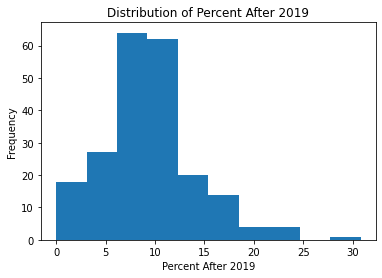

<IPython.core.display.Javascript object>

In [50]:
# looking at distribution to bin
plt.hist(df3["percent_after_2019"], bins=10)
plt.xlabel("Percent After 2019")
plt.ylabel("Frequency")
plt.title("Distribution of Percent After 2019")
plt.show()

In [51]:
# creating new binary columns
df3['new_occupants_0_5_percent'] = np.where((df3['percent_after_2019'] >= 0) & (df3['percent_after_2019'] <= 5), 1, 0)
df3['new_occupants_5_10_percent'] = np.where((df3['percent_after_2019'] > 5) & (df3['percent_after_2019'] <= 10), 1, 0)
df3['new_occupants_10_15_percent'] = np.where((df3['percent_after_2019'] > 10) & (df3['percent_after_2019'] <= 15), 1, 0)
df3['new_occupants_above_15_percent'] = np.where(df3['percent_after_2019'] > 15, 1, 0)



<IPython.core.display.Javascript object>

In [52]:
correlation_matrix = df3.corr()
approval_correlation = correlation_matrix['approval_percentage'].drop('approval_percentage')


<IPython.core.display.Javascript object>

In [53]:
approval_correlation.sort_values(ascending=False)


median_homeowner_value            0.656074
zip_median_income                 0.557611
percent_2000_2499                 0.408999
median_rental_value               0.390081
percent_2500_2999                 0.380334
percent_1500_1999                 0.348803
percent_more_3000                 0.300137
percent_after_2019                0.295766
new_occupants_above_15_percent    0.221154
percent_2015_2019                 0.220250
rent_15_20_percent_income         0.173388
rental_vacancy_rate               0.134998
new_occupants_10_15_percent       0.130350
percent_occupied                  0.112801
rent_25_30_percent_income         0.087906
rent_20_25_percent_income         0.069571
percent_owner_occupied            0.062552
rent_less_15_percent_income       0.030787
percent_2010_2014                 0.021477
homeowner_vacancy_rate           -0.031188
median_age_of_housing_units      -0.044430
percent_renter_occupied          -0.062552
zipcode                          -0.093147
rent_30_35_

<IPython.core.display.Javascript object>

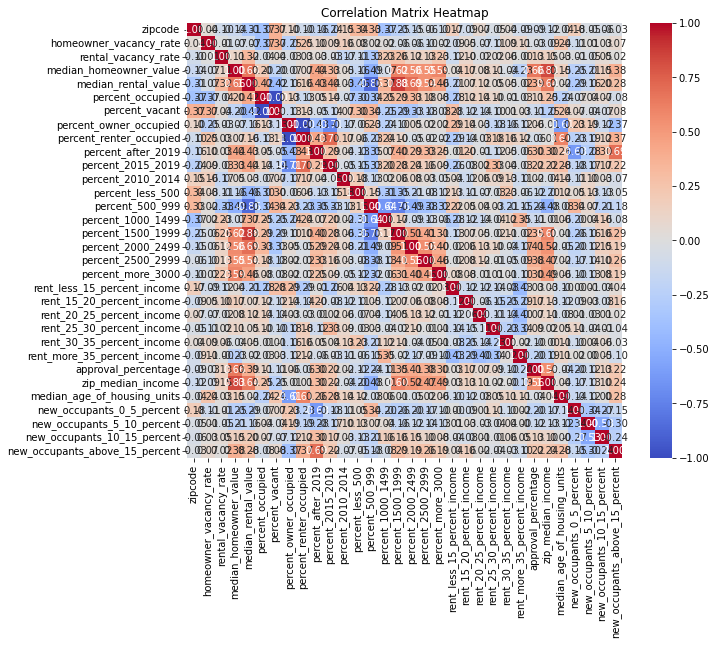

<IPython.core.display.Javascript object>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df3.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [55]:
# checking if there are any missing zipcodes
all(poi2["zip_code"].isin(zipcodes))

False

<IPython.core.display.Javascript object>

In [56]:
# checking what is the missing zipcode
set(zipcodes) - set(poi2["zip_code"])

{30070}

<IPython.core.display.Javascript object>

#### Feature engineer: Local Coffee Shops

In [57]:
poi2[poi2["category"].str.contains("coffee", case=False)].category.value_counts()

coffee shop                1168
coffee store                226
coffee roasters              24
coffee wholesaler            14
coffee stand                  6
coffee machine supplier       3
coffee vending machine        1
Name: category, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
pd.set_option("display.max_rows", None)
poi2[poi2["category"].str.contains("coffee", case=False)].name.value_counts()

Starbucks                                                                                                              428
McDonald's                                                                                                             252
Dunkin'                                                                                                                157
Panera Bread                                                                                                            42
Circle K                                                                                                                29
Krispy Kreme                                                                                                            14
Einstein Bros. Bagels                                                                                                   13
Cinnabon                                                                                                                 7
Caribou Coffee  

<IPython.core.display.Javascript object>

In [59]:
coffee_chains = [
    "Starbucks",
    "Auntie Anne's",
    "McDonald's",
    "Krispy Kreme",
    "Golden Pantry Office",
    "The Honey Baked Ham Company",
    "Barnes & Noble",
    "Circle K",
    "RaceTrac",
    "Golden Pantry",
    "Panera Bread",
    "Einstein Bros. Bagels",
    "Sam's Club Cafe",
    "Dunkin",
    "Dunkin’",
    "Dunkin'",
    "Circle K",
    "Einstein Bros. Bagels",
    "Cinnabon",
    "Caribou Coffee",
    "Scooter's Coffee",
    "WFM Coffee Bar",
    "Golden Pantry",
    "Starbucks - Main Lobby Home Depot HQ",
    "Starbucks in Kroger",
    "Chevron Food Mart",
    "Starbucks Roswell and Windsor Parkway",
]
coffee_cats = ["coffee shop", "coffee store", "coffee stand"]

# Replace 'Coffee Shop' with 'Local Coffee' for all local coffee shops
poi2.loc[
    (poi2["category"].isin(coffee_cats)) & (~poi2["name"].isin(coffee_chains)),
    "category",
] = "local coffee"

<IPython.core.display.Javascript object>

In [60]:
print("No. of local Coffee Shops: ", len(poi2[poi2["category"] == "local coffee"]))
poi2[poi2["category"] == "local coffee"]

No. of local Coffee Shops:  431


,zip_code,name,latitude,longitude,category,avg_rating,num_of_reviews,primary_category
767,30303,Mocha Pops,33.756128,-84.389862,local coffee,5.0,20,Ice cream shop
2018,30075,1234 Cafee’,34.032294,-84.351763,local coffee,4.7,8,Coffee shop
2068,30161,Honeycream,34.253246,-85.172626,local coffee,5.0,26,Dessert shop
2503,30040,Bean in the Borough,34.166475,-84.179367,local coffee,4.9,52,Coffee shop
3636,30213,Rising Phoenix Coffee,33.566938,-84.599296,local coffee,5.0,5,Coffee shop
4652,30318,Galloway Cafe,33.775948,-84.395912,local coffee,3.6,8,Coffee shop
5221,30108,Bowdon Coffee Roasters,33.537911,-85.251105,local coffee,4.8,38,Coffee shop
5323,30088,Direct Sales,33.744320,-84.163050,local coffee,4.7,6,Coffee shop
6079,31822,Kat's Cafe' & Cakes,32.853726,-84.847092,local coffee,5.0,27,Bakery
8010,30308,Tea Corner,33.771460,-84.385226,local coffee,4.8,58,Bubble tea store


<IPython.core.display.Javascript object>

In [61]:
# new df that has the category appear at least 400 times
threshold = 400
cat_counts = poi2.category.value_counts()

mask = poi2["category"].map(cat_counts) >= threshold
poi3 = poi2[mask]


<IPython.core.display.Javascript object>

In [62]:
print("No. of categories in filtered poi3: ", len(poi3.category.value_counts()))
print("No. of categories in poi2:          ", len(poi2.category.value_counts()))

No. of categories in filtered poi3:  109
No. of categories in poi2:           3169


<IPython.core.display.Javascript object>

In [63]:
poi3["category"].value_counts()

restaurant                      5981
fast food restaurant            3032
auto repair shop                2317
takeout restaurant              2210
gas station                     2077
hair salon                      2002
beauty salon                    1991
american restaurant             1954
convenience store               1852
breakfast restaurant            1690
grocery store                   1573
caterer                         1506
sandwich shop                   1479
clothing store                  1466
church                          1429
nail salon                      1424
tire shop                       1302
atm                             1292
doctor                          1162
park                            1158
mexican restaurant              1156
apartment complex               1150
pizza restaurant                1139
bar                             1093
family restaurant               1058
dentist                         1057
barber shop                     1051
h

<IPython.core.display.Javascript object>

In [64]:
# creating a new df from poi3 that with feature engineered columns

# storing the counts of primary_category values for each zip code
poi4 = poi3.groupby('zip_code')['category'].value_counts().unstack(fill_value=0)

# adding columnn for count of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7'] = poi3[(poi3['category'] == 'restaurant') & (poi3['avg_rating'] >= 4.7)].groupby('zip_code')['category'].count()

# another for the count of restaurants with avg_rating < 4.7
poi4['restaurant_below_4.7'] = poi3[(poi3['category'] == 'restaurant') & (poi3['avg_rating'] < 4.7)].groupby('zip_code')['category'].count()

# percentage of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7_percentage'] = (poi4['restaurant_above_4.7'] / poi4['restaurant']) * 100

# Reset the index of the new DataFrame
poi4.reset_index(inplace=True)


<IPython.core.display.Javascript object>

In [65]:
poi4.isna().sum().sort_values(ascending=False)

category
restaurant_above_4.7_percentage    88
restaurant_above_4.7               88
restaurant_below_4.7               42
local coffee                        0
pet groomer                         0
park                                0
oil change service                  0
non-profit organization             0
nail salon                          0
moving supply store                 0
mexican restaurant                  0
mens clothing store                 0
medical clinic                      0
mechanic                            0
massage therapist                   0
life insurance agency               0
liquor store                        0
pizza delivery                      0
jewelry store                       0
italian restaurant                  0
insurance agency                    0
ice cream shop                      0
hotel                               0
home insurance agency               0
home goods store                    0
hamburger restaurant                0
hai

<IPython.core.display.Javascript object>

#### zip aggregate

In [66]:
# creating new df with combined info of df3 and poi4
df4 = df3.merge(poi4, left_on='zipcode', right_on='zip_code')


<IPython.core.display.Javascript object>

In [67]:
df4

,zipcode,homeowner_vacancy_rate,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_occupied,percent_vacant,percent_owner_occupied,percent_renter_occupied,percent_after_2019,percent_2015_2019,percent_2010_2014,percent_less_500,percent_500_999,percent_1000_1499,percent_1500_1999,percent_2000_2499,percent_2500_2999,percent_more_3000,rent_less_15_percent_income,rent_15_20_percent_income,rent_20_25_percent_income,rent_25_30_percent_income,rent_30_35_percent_income,rent_more_35_percent_income,approval_percentage,zip_median_income,median_age_of_housing_units,new_occupants_0_5_percent,new_occupants_5_10_percent,new_occupants_10_15_percent,new_occupants_above_15_percent,zip_code,american restaurant,apartment building,apartment complex,atm,attorney,auto body shop,auto insurance agency,auto parts store,auto repair shop,bakery,bank,baptist church,bar,bar & grill,barbecue restaurant,barber shop,beauty salon,beauty supply store,brake shop,breakfast restaurant,business center,cafe,car battery store,car dealer,car repair and maintenance,car wash,caterer,cell phone store,chicken restaurant,chicken wings restaurant,childrens clothing store,chinese restaurant,chiropractor,church,clothing store,coffee shop,convenience store,corporate office,cosmetic dentist,cosmetics store,deli,delivery restaurant,dentist,department store,diner,discount store,doctor,dollar store,drug store,electronics store,event venue,family restaurant,fashion accessories store,fast food restaurant,furniture store,gas station,gift shop,grocery store,gym,hair salon,hamburger restaurant,home goods store,home insurance agency,hotel,ice cream shop,insurance agency,italian restaurant,jewelry store,life insurance agency,liquor store,local coffee,massage therapist,mechanic,medical clinic,mens clothing store,mexican restaurant,moving supply store,nail salon,non-profit organization,oil change service,park,pet groomer,pharmacy,pizza delivery,pizza restaurant,pizza takeout,real estate agency,renters insurance agency,restaurant,sandwich shop,seafood restaurant,self-storage facility,shipping and mailing service,shoe store,shopping mall,storage facility,store,supermarket,takeout restaurant,telephone company,tire shop,tobacco shop,tourist attraction,toy store,truck accessories store,used car dealer,veterinarian,waxing hair removal service,womens clothing store,restaurant_above_4.7,restaurant_below_4.7,restaurant_above_4.7_percentage
0,30002,1.8,7.0,432400.0,933.0,89.2,10.8,56.5,43.5,21.0,26.2,16.8,1.9,70.6,18.2,7.7,0.8,0.0,0.8,12.4,3.2,14.6,5.7,13.5,50.7,87.51,64488,44,0,0,0,1,30002,2,2,1,1,0,1,1,0,0,1,0,1,8,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,2,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,2,0,1,2,0,0,1,0,0,1,9,1,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1.0,8.0,11.111111
1,30004,0.3,4.5,444200.0,1478.0,98.1,1.9,76.4,23.6,10.3,37.4,19.6,0.7,7.2,44.8,30.1,10.1,1.3,5.7,9.7,15.2,24.5,13.8,12.2,24.5,90.60,137621,16,0,0,1,0,30004,7,3,3,14,2,6,4,12,29,10,7,4,4,4,1,9,13,3,9,15,5,8,5,11,7,5,14,6,2,4,0,5,8,10,3,11,17,9,3,2,2,5,9,3,0,4,8,1,4,8,5,4,0,26,3,20,1,11,7,14,9,4,4,6,4,5,5,0,4,5,4,7,4,1,0,13,3,6,2,8,1,8,4,5,12,2,3,4,42,13,3,3,4,0,8,2,3,3,17,5,12,1,1,3,4,12,5,3,0,4.0,38.0,9.523810
2,30005,0.8,8.8,464100.0,1712.0,94.7,5.3,71.9,28.1,11.8,32.7,18.5,0.3,0.8,32.0,39.8,19.5,5.5,2.1,17.4,25.8,14.5,5.9,5.8,30.5,91.29,166438,15,0,0,1,0,30005,12,9,8,6,5,0,5,1,3,10,5,0,4,2,4,5,8,0,4,13,13,6,2,0,1,2,15,1,2,5,0,4,4,3,0,5,3,20,9,1,2,6,14,0,2,1,18,1,1,0,3,8,0,17,1,3,2,3,7,7,2,1,5,4,6,5,2,1,5,3,6,4,0,8,0,8,3,7,1,5,8,0,2,2,8,2,7,5,39,9,3,2,4,0,3,4,6,1,16,0,2,1,5,0,0,0,2,1,1,2.0,37.0,5.128205
3,30008,2.4,2.0,200700.0,1195.0,93.8,6.2,60.2,39.8,8.8,31.7,19.6,5.0,27.7,49.7,12.8,4.9,0.0,0.0,7.5,8.9,9.9,10.5,17.3,45.9,85.11,62058,35,0,1,0,0,30008,9,6,6,2,2,3,1,4,15,1,0,0,0,1,3,0,3,4,4,6,1,0,2,1,4,5,3,4,4,4,0,1,3,3,3,1,4,0,0,0,1,1,1,3,3,4,2,3,0,1,5,8,0,10,2,5,1,6,0,2,2,2,1,0,1,2,1,0,1,3,0,1,5,1,0,4,2,2,2,6,2,3,2,2,3,3,0,1,15,1,2,2,0,0,1,2,1,2,5,2,8,4,1,2,2,2

<IPython.core.display.Javascript object>

## Correlation with different variables

In [68]:
# median age correlation

correlation1 = df4.corr()["median_age_of_housing_units"].sort_values(ascending=False)
correlation1

median_age_of_housing_units        1.000000
percent_renter_occupied            0.606776
apartment complex                  0.422588
non-profit organization            0.330195
apartment building                 0.295701
percent_2015_2019                  0.281538
new_occupants_above_15_percent     0.279809
bar                                0.277681
tobacco shop                       0.270624
percent_after_2019                 0.260194
homeowner_vacancy_rate             0.241460
percent_vacant                     0.238312
liquor store                       0.205238
local coffee                       0.200441
restaurant_above_4.7               0.191362
seafood restaurant                 0.190778
tourist attraction                 0.189351
event venue                        0.171990
barber shop                        0.169353
restaurant                         0.160777
median_homeowner_value             0.146944
rent_more_35_percent_income        0.134879
percent_2010_2014               

<IPython.core.display.Javascript object>

In [69]:
# approval percentage
df4.corr()['approval_percentage'].sort_values(ascending=False)



approval_percentage                1.000000
median_homeowner_value             0.653251
zip_median_income                  0.556199
percent_2000_2499                  0.406461
median_rental_value                0.390081
percent_2500_2999                  0.378692
local coffee                       0.348079
percent_1500_1999                  0.343994
veterinarian                       0.333897
massage therapist                  0.331140
chiropractor                       0.329248
italian restaurant                 0.325485
cafe                               0.311451
real estate agency                 0.301605
percent_more_3000                  0.298628
percent_after_2019                 0.287858
bar                                0.284845
cosmetic dentist                   0.282891
pet groomer                        0.282881
park                               0.278672
bakery                             0.275945
waxing hair removal service        0.272723
gym                             

<IPython.core.display.Javascript object>

In [70]:
# median_homeowner_value
df4.corr()["median_homeowner_value"].sort_values(ascending=False)

median_homeowner_value             1.000000
zip_median_income                  0.835088
median_rental_value                0.657640
approval_percentage                0.653251
percent_1500_1999                  0.616186
percent_more_3000                  0.588295
percent_2000_2499                  0.562588
percent_2500_2999                  0.545179
bar                                0.524449
italian restaurant                 0.515773
real estate agency                 0.512486
waxing hair removal service        0.484243
local coffee                       0.482084
massage therapist                  0.466445
cafe                               0.464023
gym                                0.463891
percent_after_2019                 0.432729
business center                    0.422374
cosmetic dentist                   0.420921
chiropractor                       0.409863
tourist attraction                 0.387588
delivery restaurant                0.380397
dentist                         

<IPython.core.display.Javascript object>

In [71]:
# looking at top correlation between features

# correlation matrix
correlation_matrix = df4.corr()

# upper triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(600))


zipcode                       zip_code                        1.000000
restaurant                    restaurant_below_4.7            0.995548
auto insurance agency         home insurance agency           0.977181
home insurance agency         renters insurance agency        0.976075
                              life insurance agency           0.968398
mens clothing store           womens clothing store           0.966425
auto insurance agency         renters insurance agency        0.965005
clothing store                womens clothing store           0.964455
                              shoe store                      0.961921
fashion accessories store     womens clothing store           0.961086
shoe store                    womens clothing store           0.952211
fashion accessories store     shoe store                      0.952024
life insurance agency         renters insurance agency        0.950323
mens clothing store           shoe store                      0.949952
clothi

<IPython.core.display.Javascript object>

In [72]:
# doing the same for negative corr

# correlation matrix
correlation_matrix = df4.corr()

# lower triangular portion of the correlation matrix
lower_triangle = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# stacking the lower triangle portion into a DataFrame
correlation = lower_triangle.stack().sort_values()

# Print the 20 most negatively correlated variables
print(correlation.head(400))


percent_renter_occupied          percent_owner_occupied         -1.000000
percent_vacant                   percent_occupied               -1.000000
percent_500_999                  median_rental_value            -0.863412
percent_1500_1999                percent_500_999                -0.768884
percent_2015_2019                percent_owner_occupied         -0.706011
apartment complex                percent_owner_occupied         -0.673232
percent_1000_1499                percent_500_999                -0.637490
new_occupants_0_5_percent        percent_after_2019             -0.617687
apartment building               percent_owner_occupied         -0.616482
median_age_of_housing_units      percent_owner_occupied         -0.606776
shopping mall                    percent_500_999                -0.585976
hair salon                       percent_500_999                -0.576960
caterer                          percent_500_999                -0.571246
breakfast restaurant             perce

<IPython.core.display.Javascript object>

## New dataframe with df3 and poi2 combined

In [73]:


# merging the dataframes based on zip code
merged = pd.merge(poi2, df3[['zipcode', 'rental_vacancy_rate', 'median_homeowner_value', 'median_rental_value',
                             'percent_after_2019', 'rent_more_35_percent_income', 'rent_less_15_percent_income',
                             'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']],
                  left_on='zip_code', right_on='zipcode', how='left')

# dropping the duplicate 'zipcode' column
merged.drop('zipcode', axis=1, inplace=True)



<IPython.core.display.Javascript object>

In [74]:
# looking at highly corr features

# correlation matrix
correlation_matrix = merged.corr()

# triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(10))


median_homeowner_value  zip_median_income         0.841361
                        median_rental_value       0.700074
                        approval_percentage       0.696388
median_rental_value     zip_median_income         0.661959
approval_percentage     zip_median_income         0.601375
median_rental_value     approval_percentage       0.459524
latitude                approval_percentage       0.396032
median_homeowner_value  percent_after_2019        0.383551
median_rental_value     percent_after_2019        0.340265
latitude                median_homeowner_value    0.314684
dtype: float64


<IPython.core.display.Javascript object>

In [75]:
# correlation
merged.corr()["approval_percentage"].sort_values(ascending=False)

approval_percentage            1.000000
median_homeowner_value         0.696388
zip_median_income              0.601375
median_rental_value            0.459524
latitude                       0.396032
percent_after_2019             0.312322
rent_less_15_percent_income    0.147120
avg_rating                     0.105056
longitude                     -0.001660
rental_vacancy_rate           -0.003104
median_age_of_housing_units   -0.012285
num_of_reviews                -0.031688
zip_code                      -0.076969
rent_more_35_percent_income   -0.332703
Name: approval_percentage, dtype: float64

<IPython.core.display.Javascript object>

## Visuals

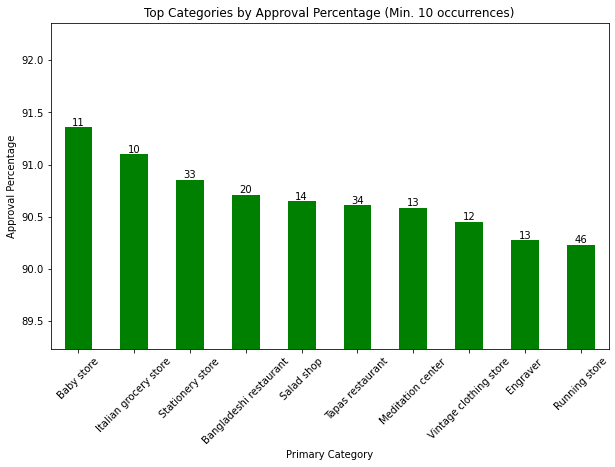

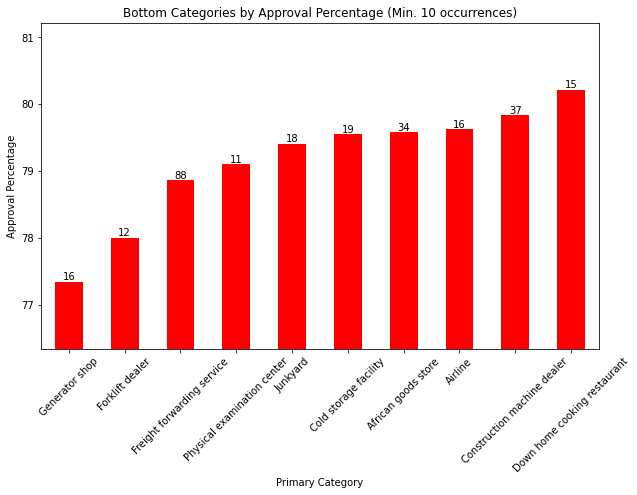

<IPython.core.display.Javascript object>

In [76]:


# occurrences of each primary_category
category_counts = merged['primary_category'].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged['primary_category'].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby('primary_category')['approval_percentage'].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='green')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Top Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(top_categories.min() - 1, top_categories.max() + 1)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind='bar', color='red')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Bottom Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(bottom_categories.min() - 1, bottom_categories.max() + 1)  # adjusting the y-axis range

plt.show()


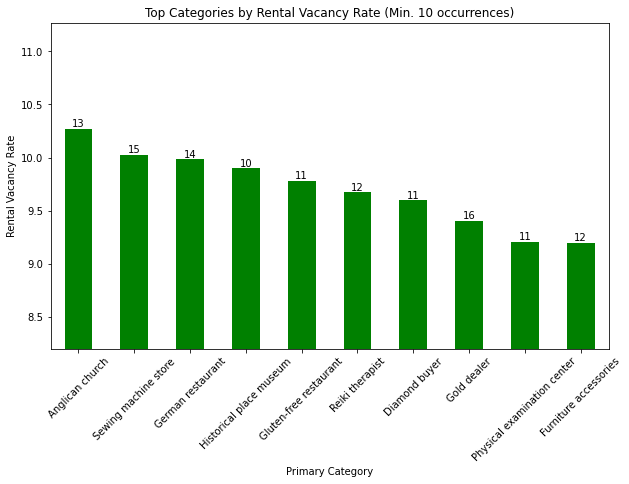

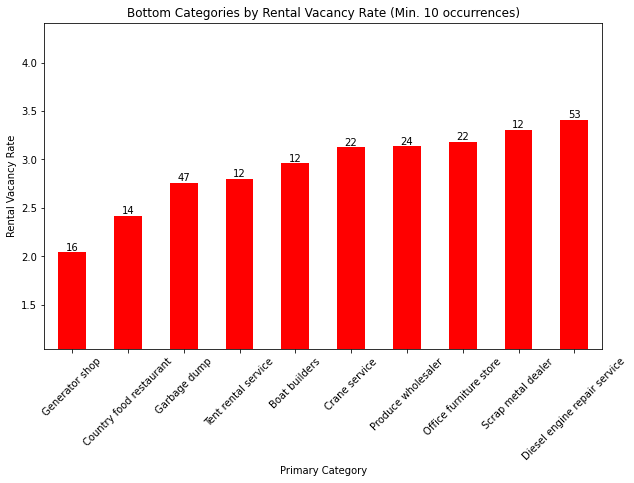

<IPython.core.display.Javascript object>

In [77]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "rental_vacancy_rate"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Top Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Bottom Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

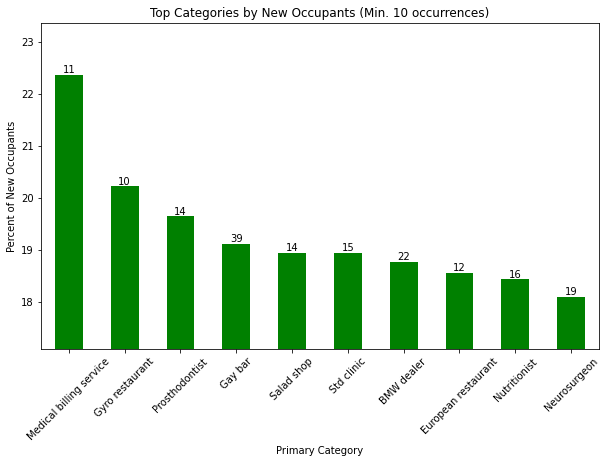

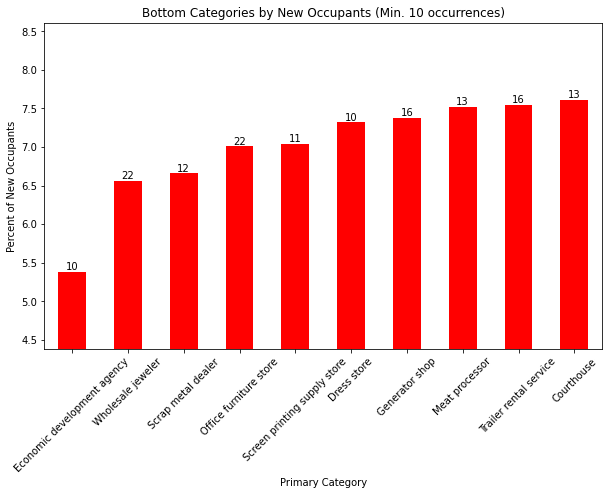

<IPython.core.display.Javascript object>

In [78]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "percent_after_2019"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Top Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Bottom Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert latitude and longitude to radians
merged['latitude_rad'] = merged['latitude'].apply(radians)
merged['longitude_rad'] = merged['longitude'].apply(radians)

# Prepare data for clustering
X = merged[['latitude_rad', 'longitude_rad']].values

# Compute Haversine distance matrix
dist_matrix = haversine_distances(X)

# Set epsilon (maximum distance between samples) to 0.25 miles
epsilon = 0.25 / 3959

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=6, metric='precomputed')
labels = dbscan.fit_predict(dist_matrix)

# Add cluster labels to the dataframe
merged['cluster_label'] = labels

# Filter dataframe to include only clusters with more than one observation
clustered_df = merged[merged['cluster_label'] != -1]

# Identify primary_category values within the same cluster
clustered_categories = clustered_df.groupby('cluster_label')['primary_category'].unique()

# Print the primary_category values within the same cluster
for cluster_label, categories in clustered_categories.items():
    print(f"Cluster {cluster_label}: {', '.join(categories)}")


In [ ]:
df3

In [ ]:
df4

In [ ]:
merged_df

In [ ]:
merged

In [ ]:
# range of approval_percentage
approval_min = merged['approval_percentage'].min()
approval_max = merged['approval_percentage'].max()

# printing the range
print(f"Range of approval_percentage: {approval_min} to {approval_max}")


In [ ]:
# # looking at produce wholesaler observations
merged[merged['primary_category'] == 'Produce wholesaler']



In [ ]:
merged.to_csv('poi_expanded.csv', index=False)


In [ ]:
df4.to_csv("zipcode_expanded", index=False)

In [ ]:

# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
poi.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "points-of-interest-google3.csv"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  

In [ ]:
# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "census_data"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  # C

## Expirimenting with GeoSpatial Correlation

In [83]:
print("poi2: ", poi2.shape)
print("poi3: ", poi3.shape)

poi2:  (213319, 8)
poi3:  (99375, 8)


<IPython.core.display.Javascript object>

In [85]:
file_name = "listings_with_tract.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
listings = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [86]:
listings.head(3)

,latitude,longitude,full_street_address,city,county_name,beds,baths_full,baths_half,square_footage,lot_size,year_built,details,special_features,price,transaction_type,listing_status,listing_special_features,census_state_name,census_county_name,zip,GEOID,census_tract_number
0,33.971863,-83.618736,633 Marigot Way,Statham,Barrow-County,3.0,2.0,0.0,1634.0,1.0,2004.0,"Detached, 3 Beds, 2 Baths, 1,634 Sq Ft",0,305000,1,1,0,Georgia,"Barrow, GA",30666,13013180401,13013180401
1,34.018024,-83.663994,431 Dunahoo Road,Winder,Barrow-County,3.0,2.0,0.0,1625.0,0.0,1998.0,"Detached, 3 Beds, 2 Baths, 1,625 Sq Ft",0,349900,1,1,0,Georgia,"Barrow, GA",30680,13013180301,13013180301
2,34.003227,-83.749001,471 Monticello Court,Winder,Barrow-County,4.0,3.0,0.0,1816.0,0.0,2001.0,"Detached, 4 Beds, 3 Baths, 1,816 Sq Ft",0,289900,1,1,0,Georgia,"Barrow, GA",30680,13013180303,13013180303


<IPython.core.display.Javascript object>

In [84]:
poi3.head()

,zip_code,name,latitude,longitude,category,avg_rating,num_of_reviews,primary_category
1,30096,Gwinnett Community Bank,34.007883,-84.133413,bank,3.0,2,Bank
1,30096,Gwinnett Community Bank,34.007883,-84.133413,atm,3.0,2,Bank
2,30096,Corley Insurance Inc,34.006241,-84.136169,insurance agency,4.1,8,Insurance agency
2,30096,Corley Insurance Inc,34.006241,-84.136169,auto insurance agency,4.1,8,Insurance agency
2,30096,Corley Insurance Inc,34.006241,-84.136169,home insurance agency,4.1,8,Insurance agency


<IPython.core.display.Javascript object>

In [88]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(poi3['longitude'], poi3['latitude'])]
gdf = gpd.GeoDataFrame(poi3, geometry=geometry)

# Save GeoDataFrame as Shapefile
output_path = '../data/poi3_geoDataFrame.shp'
gdf.to_file(output_path)


/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_81387/600262422.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path)


<IPython.core.display.Javascript object>

In [95]:
from pysal.explore import esda

<IPython.core.display.Javascript object>

In [90]:
# Read geospatial data
data = gpd.read_file("../data/poi3_geoDataFrame.shp")

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


<IPython.core.display.Javascript object>

In [92]:
data.head()

,zip_code,name,latitude,longitude,category,avg_rating,num_of_rev,primary_ca,geometry
0,30096,Gwinnett Community Bank,34.007883,-84.133413,bank,3.0,2,Bank,POINT (-84.13341 34.00788)
1,30096,Gwinnett Community Bank,34.007883,-84.133413,atm,3.0,2,Bank,POINT (-84.13341 34.00788)
2,30096,Corley Insurance Inc,34.006241,-84.136169,insurance agency,4.1,8,Insurance agency,POINT (-84.13617 34.00624)
3,30096,Corley Insurance Inc,34.006241,-84.136169,auto insurance agency,4.1,8,Insurance agency,POINT (-84.13617 34.00624)
4,30096,Corley Insurance Inc,34.006241,-84.136169,home insurance agency,4.1,8,Insurance agency,POINT (-84.13617 34.00624)


<IPython.core.display.Javascript object>

In [97]:
import pysal.lib as libpysal

<IPython.core.display.Javascript object>

In [98]:
# Perform spatial autocorrelation analysis
y = data['geometry']  # Variable to analyze

# Create a spatial weights matrix
w = libpysal.weights.Queen.from_dataframe(data)

# Calculate Moran's I
moran = esda.Moran(y, w)

# Print Moran's I statistic and p-value
print("Moran's I:", moran.I)
print("p-value:", moran.p_sim)


KeyError: 30125

<IPython.core.display.Javascript object>

In [ ]:
# To perform a geospatial correlation between two dataframes based on latitude and longitude in Python, you can use the geospatial libraries like GeoPandas and Shapely. Here's a step-by-step guide to help you:

# Install the necessary libraries:
# python
# Copy code
# pip install geopandas shapely
# Import the required libraries:
# python
# Copy code
# import geopandas as gpd
# from shapely.geometry import Point
# Load the data into DataFrames:
# python
# Copy code
# df1 = gpd.read_file('path_to_dataframe1.csv')
# df2 = gpd.read_file('path_to_dataframe2.csv')
# Make sure that your dataframes contain columns for latitude and longitude.

# Create Point objects from latitude and longitude:
# python
# Copy code
# geometry1 = [Point(xy) for xy in zip(df1['longitude'], df1['latitude'])]
# geometry2 = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
# Convert the lists of Point objects into GeoDataFrames:
# python
# Copy code
# gdf1 = gpd.GeoDataFrame(df1, geometry=geometry1)
# gdf2 = gpd.GeoDataFrame(df2, geometry=geometry2)
# Perform the spatial join or correlation:
# python
# Copy code
# correlated_data = gpd.sjoin(gdf1, gdf2, how='inner', op='intersects')
# The how parameter specifies the type of join ('inner', 'left', 'right', or 'outer'), and the op parameter specifies the type of spatial relationship ('intersects', 'contains', 'within', etc.).

# Analyze the correlated data as per your requirements:
# python
# Copy code
# print(correlated_data)
# You can access the correlated data and perform further analysis or calculations on the resulting DataFrame.

# Make sure that your dataframes have a consistent coordinate reference system (CRS). If they have different CRS, you may need to reproject one or both dataframes to a common CRS before performing the spatial join.

# By following these steps, you should be able to perform a geospatial correlation between two dataframes using latitude and longitude in Python.